<a href="https://colab.research.google.com/github/hanashameer/promotion-prediction-ml/blob/main/final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier




In [ ]:
# Loading data
train = pd.read_csv('/content/train_LZdllcl.csv')
test = pd.read_csv('/content/test_2umaH9m.csv')
sample_submission = pd.read_csv('/content/sample_submission_M0L0uXE.csv')


In [ ]:
#EDA

In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (54808, 14)
Test shape: (23490, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


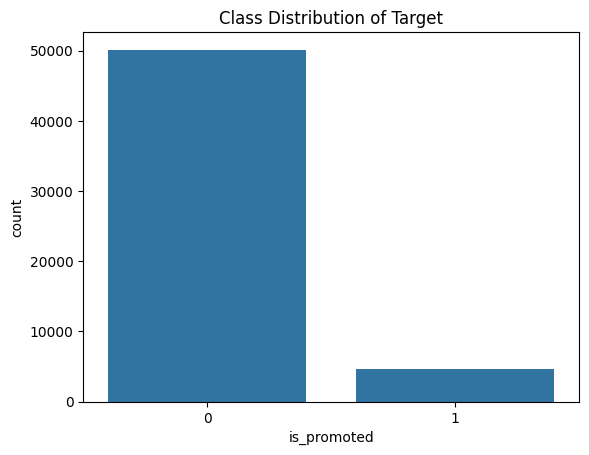

In [ ]:
# Target variable distribution
sns.countplot(x='is_promoted', data=train)
plt.title("Class Distribution of Target")
plt.show()


In [ ]:
# Check missing values
print(train.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


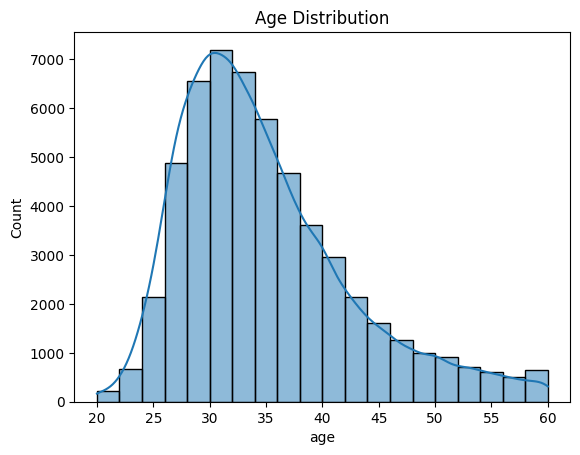

In [ ]:
# Age Distribution
sns.histplot(train['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

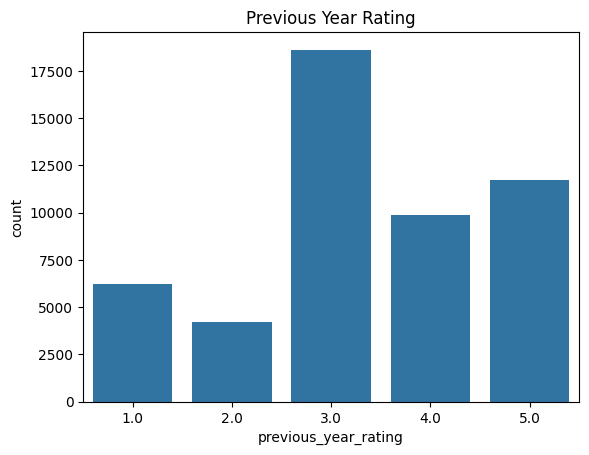

In [ ]:
# Rating
sns.countplot(x='previous_year_rating', data=train)
plt.title("Previous Year Rating")
plt.show()


In [ ]:
# Crosstab: KPI vs Promotion
print(pd.crosstab(train['KPIs_met >80%'], train['is_promoted'], normalize='index'))

is_promoted           0         1
KPIs_met >80%                    
0              0.960413  0.039587
1              0.830906  0.169094


In [ ]:
#Pre-processing
# Fill missing values
train['education'].fillna('Unknown', inplace=True)
test['education'].fillna('Unknown', inplace=True)

train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].median(), inplace=True)
train

/tmp/ipython-input-89-2315724131.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['education'].fillna('Unknown', inplace=True)
/tmp/ipython-input-89-2315724131.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Unknown,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70


In [ ]:

# Encode categorical features
cat_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
le = LabelEncoder()
for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])  # SAME encoder
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,33,3,1,2,1,29,1.0,2,0,0,45,0


In [ ]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,1,1,2,1,24,3.0,1,0,0,61
23486,25600,8,17,0,1,2,1,31,3.0,7,0,0,74
23487,45409,2,7,0,0,2,1,26,4.0,4,0,0,50
23488,1186,5,24,0,1,2,3,27,3.0,1,0,0,70


In [ ]:
# Drop employee_id
train.drop('employee_id', axis=1, inplace=True)
test_ids = test['employee_id']  # Save IDs for submission
test.drop('employee_id', axis=1, inplace=True)


In [ ]:
#model

In [ ]:
# Split train into train & validation
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train on train/validation split
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
gb_preds = gb_model.predict(X_val)
gb_f1 = f1_score(y_val, gb_preds)
print("Gradient Boosting F1 Score (Validation):", gb_f1)




Gradient Boosting F1 Score (Validation): 0.428927680798005


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.96      0.28      0.43       934

    accuracy                           0.94     10962
   macro avg       0.95      0.64      0.70     10962
weighted avg       0.94      0.94      0.92     10962



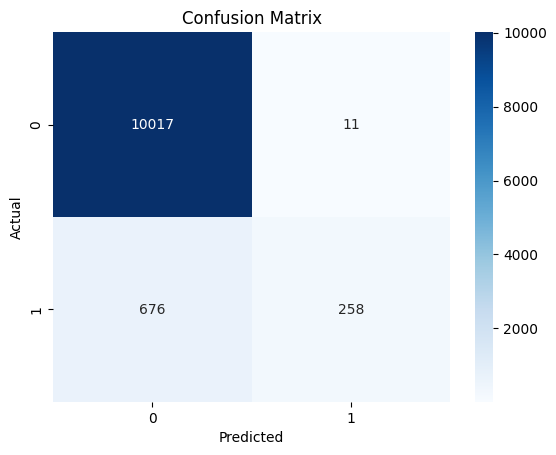

In [ ]:

# Predicting
y_pred = gb_model.predict(X_val)  # Replace with correct variable/model
# If one-hot encoded: y_pred = np.argmax(model.predict(X_val), axis=1)

# Evaluation
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#tuning

In [ ]:
# Parameter grid for tuning
params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}
# Initialize the base model
gb = GradientBoostingClassifier(random_state=42)

# GridSearchCV
grid = GridSearchCV(estimator=gb,
                    param_grid=params,
                    scoring='f1',
                    cv=3,
                    verbose=1,
                    n_jobs=-1)

# Fit on training data
grid.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid.best_params_)

# Best model
best_gb_model = grid.best_estimator_

# Predict on validation set
val_preds = best_gb_model.predict(X_val)
f1 = f1_score(y_val, val_preds)
print("Tuned F1 Score (Validation):", f1)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Tuned F1 Score (Validation): 0.5077881619937694


In [ ]:
# Predict on test data
test_preds = best_gb_model.predict(test)

# Reload sample submission if needed
submission = pd.read_csv('/content/sample_submission_M0L0uXE.csv')

# Fill prediction column
submission['is_promoted'] = test_preds

# Save as CSV
submission.to_csv('/content/final_submission_gb.csv', index=False)

# Download the file
from google.colab import files
files.download('/content/final_submission_gb.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>